In [33]:
import pandas as pd
import os

#### merging 12 months of sales data into singl CSV file

In [34]:
###### merging 12 months of sales data into single csv

df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")


files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

#### reading updated dataframe

In [35]:
all_data = pd.read_csv("all_data.csv")
all_data.head()
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


#### Clean up Data

In [36]:
#### dropping NaN rows

nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [37]:
#### Find 'Or' in the dataset and delete it

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [38]:
#### Converting columns to correct data type

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Augment Data With Additional Columns

In [39]:
#### Add a Sales Column

all_data['Sales'] = all_data['Quantity Ordered'] = all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,11.95,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",11.95
2,176559,Bose SoundSport Headphones,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [40]:
#### Adding Columns for Months

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,11.95,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",11.95,4
2,176559,Bose SoundSport Headphones,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


#### Finding best month for sales? How much was earned in that month?

In [47]:
all_data.groupby('Month').sum()

results = all_data.groupby('Month').sum()

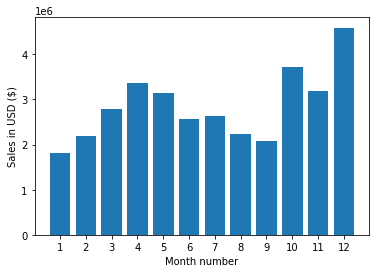

In [49]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Which City had the Highest Sales Figures?

In [50]:
####Add A City Column
####Add A City Column

all_data['Column'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1 ])

###apply funciton lets us work within a column's x values

all_data.head()

#### alternative method using defined function

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
#### space after "St," need to use second index to get the state for each city

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Column,City
0,176558,USB-C Charging Cable,11.95,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",11.95,4,Dallas,Dallas TX
2,176559,Bose SoundSport Headphones,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,Boston MA
3,176560,Google Phone,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,Los Angeles CA
4,176560,Wired Headphones,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,Los Angeles CA
5,176561,Wired Headphones,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,Los Angeles CA


In [51]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta GA,2.779908e+06,2.779908e+06,2.779908e+06,104794
Austin TX,1.809874e+06,1.809874e+06,1.809874e+06,69829
Boston MA,3.637410e+06,3.637410e+06,3.637410e+06,141112
Dallas TX,2.752628e+06,2.752628e+06,2.752628e+06,104620
Los Angeles CA,5.421435e+06,5.421435e+06,5.421435e+06,208325
New York City NY,4.635371e+06,4.635371e+06,4.635371e+06,175741
Portland ME,4.471893e+05,4.471893e+05,4.471893e+05,17144
Portland OR,1.860558e+06,1.860558e+06,1.860558e+06,70621
San Francisco CA,8.211462e+06,8.211462e+06,8.211462e+06,315520


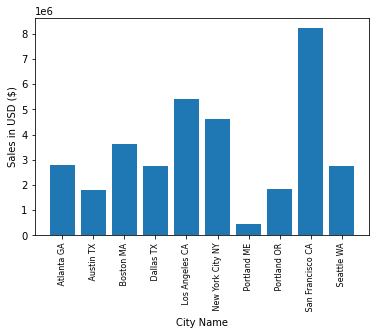

In [52]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

#####cities = all_data['City'].unique()
####this is done because the "unique()" did not keep the x and y values in the same order, causing the visualizaiton reults to be inconsistent with the table data

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

#### What time should ads be run to maximize likelihood of customers buying our products?

In [54]:
#### Reviewing the dataset

all_data.head()

#### converting Order Date column to Date/Time Library format

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

#### Adding Hour Column to data

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Column,City,Hour,Minute
0,176558,USB-C Charging Cable,11.95,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",11.95,4,Dallas,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,Boston MA,22,30
3,176560,Google Phone,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,Los Angeles CA,14,38
4,176560,Wired Headphones,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,Los Angeles CA,14,38
5,176561,Wired Headphones,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,Los Angeles CA,9,27


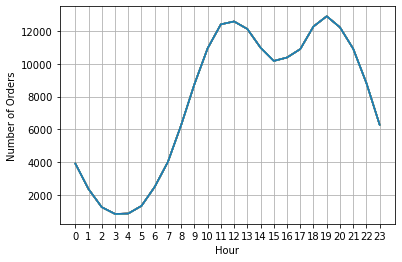

In [56]:
hours = [hour for hour,df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.grid()
plt.show()
##### I would recommend a time around 11am (11) or 7pm(19)

#### What products are most commonly purchased together? (products sold together have the same Order ID)

In [62]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

<ipython-input-62-7d8ccab84436>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [68]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']: 
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)
    
#### iPhone and Lighting Cable are most commonly purchased together 1005

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most, and why?

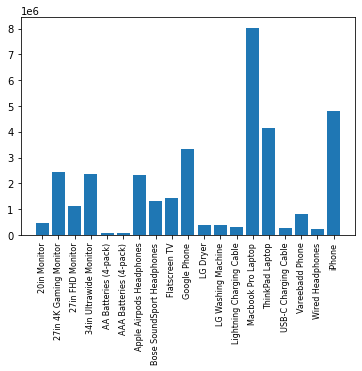

In [70]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()
